# Integrating data using ingest and BBKNN

Samples were integrated within their iwn age group using batch balanced k nearest 342 neighbor (BBKNN) algorithm (https://github.com/Teichlab/bbknn) [Polanski19]. BBKNN integrates well with the Scanpy workflow and is accessible through the bbknn function.

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.0.1
anndata             0.7.5
appnope             0.1.0
backcall            0.2.0
bottleneck          1.3.2
cairo               1.20.0
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.9.6
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
joblib              0.17.0
kiwisolver          1.3.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.34.0
louvain             0.7.0
matplotlib          3.3.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.1.1
numba               0.51.2
numexpr             2.7.1
numpy               1.19.2
packaging           20.

## Muscles



In [8]:
cd ..

/


In [9]:
cd Volumes/LaCie/PomLab/Python/scanpy-tutorials-master/write_paper

/Volumes/LaCie/PomLab/Python/scanpy-tutorials-master/write_paper


###set up your datasets

In [10]:
# Load the stored data object
adata_c = sc.read('Gastroc87F.h5ad')
adata_d = sc.read('vastus83M.h5ad')
adata_f = sc.read('vastus73M.h5ad')

In [11]:
adata_c.var_names_make_unique()
adata_d.var_names_make_unique()
adata_f.var_names_make_unique()

In [12]:
adata_c.obs['age']='old'
adata_d.obs['age']='old'
adata_f.obs['age']='old'

In [13]:
adata_c.obs['muscle']='gastrocnemius'
adata_d.obs['muscle']='vastus_lateralis'
adata_f.obs['muscle']='vastus_lateralis'

In [14]:
adata_c.obs['sample']='gastroc87F'
adata_d.obs['sample']='vastus83M'
adata_f.obs['sample']='vastus73M'

In [15]:
adata_concat = adata_c.concatenate(adata_d,
                                 adata_f,
                                 batch_key='batch')

In [16]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,age,muscle,sample,leiden,batch
AAAGAACGTGGCTGAA-1-0,509,509,707.0,12.0,1.697313,old,gastrocnemius,gastroc87F,NaN,0
AAAGAACGTGGCTGCT-1-0,2600,2595,10096.0,388.0,3.843106,old,gastrocnemius,gastroc87F,NaN,0
AAAGAACTCTCCTGCA-1-0,1719,1713,6707.0,280.0,4.174743,old,gastrocnemius,gastroc87F,NaN,0
AAAGGGCAGGTCATTC-1-0,2718,2708,10710.0,386.0,3.604109,old,gastrocnemius,gastroc87F,NaN,0
AACAACCCACCGGAAA-1-0,1519,1511,4742.0,143.0,3.015605,old,gastrocnemius,gastroc87F,NaN,0
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTAAATGC-1-2,2096,2095,7293.0,809.0,11.092829,old,vastus_lateralis,vastus73M,0,2
TTTGTTGAGTGCAGGT-1-2,2949,2947,10056.0,926.0,9.208432,old,vastus_lateralis,vastus73M,1,2
TTTGTTGCAAACTAGA-1-2,1094,1094,2210.0,63.0,2.850679,old,vastus_lateralis,vastus73M,1,2
TTTGTTGCAGTATGAA-1-2,2121,2120,6832.0,260.0,3.805621,old,vastus_lateralis,vastus73M,1,2


In [17]:
sc.pp.pca(adata_concat)
sc.pp.neighbors(adata_concat, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_concat)

# No Batch correction

In [18]:
sc.tl.leiden(adata_concat, resolution=0.5, key_added='leiden')

... storing 'age' as categorical
... storing 'muscle' as categorical
... storing 'sample' as categorical


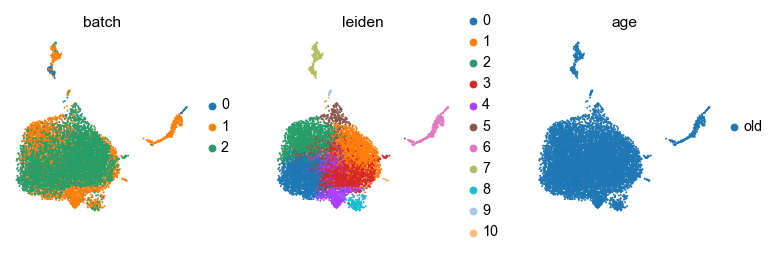

In [19]:
sc.pl.umap(adata_concat, color=['batch', 'leiden', 'age'])

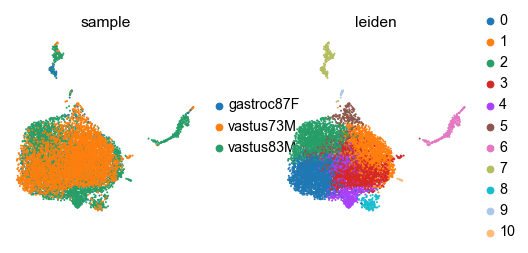

In [20]:
sc.pl.umap(adata_concat, color=['sample', 'leiden'], palette=sc.pl.palettes.vega_20_scanpy)

### BBKNN

In [21]:
%%time
sc.external.pp.bbknn(adata_concat, batch_key='batch')

CPU times: user 763 ms, sys: 3.34 ms, total: 766 ms
Wall time: 767 ms


In [22]:
sc.tl.umap(adata_concat)

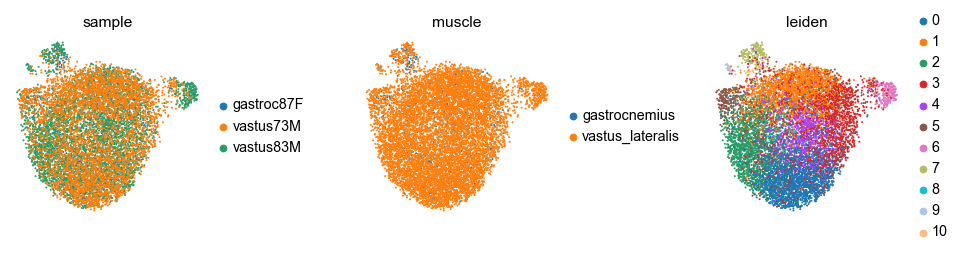

In [24]:
sc.pl.umap(adata_concat, color=['sample', 'muscle','leiden'], wspace=0.6)

In [23]:
#save to file
save_file = '/Volumes/LaCie/PomLab/Python/scvelo_notebooks-master/Loom_paper/bkknn_aged_res05.h5ad'
adata_concat.write_h5ad(save_file)